In [28]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm

Description

In [2]:
df = pd.read_stata("karlan_list_2007.dta")

df.head()

,treatment,control,ratio,ratio2,ratio3,size,size25,size50,size100,sizeno,...,redcty,bluecty,pwhite,pblack,page18_39,ave_hh_sz,median_hhincome,powner,psch_atlstba,pop_propurban
0,0,1,Control,0,0,Control,0,0,0,0,...,0.0,1.0,0.446493,0.527769,0.317591,2.10,28517.0,0.499807,0.324528,1.0
1,0,1,Control,0,0,Control,0,0,0,0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,1,0,0,"$100,000",0,0,1,0,...,0.0,1.0,0.935706,0.011948,0.276128,2.48,51175.0,0.721941,0.192668,1.0
3,1,0,1,0,0,Unstated,0,0,0,1,...,1.0,0.0,0.888331,0.010760,0.279412,2.65,79269.0,0.920431,0.412142,1.0
4,1,0,1,0,0,"$50,000",0,1,0,0,...,0.0,1.0,0.759014,0.127421,0.442389,1.85,40908.0,0.416072,0.439965,1.0


In [3]:
df.shape

(50083, 51)

In [4]:
df.describe()

,treatment,control,ratio2,ratio3,size25,size50,size100,sizeno,askd1,askd2,...,redcty,bluecty,pwhite,pblack,page18_39,ave_hh_sz,median_hhincome,powner,psch_atlstba,pop_propurban
count,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,...,49978.000000,49978.000000,48217.000000,48047.000000,48217.000000,48221.000000,48209.000000,48214.000000,48215.000000,48217.000000
mean,0.666813,0.333187,0.222311,0.222211,0.166723,0.166623,0.166723,0.166743,0.222311,0.222291,...,0.510245,0.488715,0.819599,0.086710,0.321694,2.429012,54815.700533,0.669418,0.391661,0.871968
std,0.471357,0.471357,0.415803,0.415736,0.372732,0.372643,0.372732,0.372750,0.415803,0.415790,...,0.499900,0.499878,0.168560,0.135868,0.103039,0.378105,22027.316665,0.193405,0.186599,0.258633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.009418,0.000000,0.000000,0.000000,5000.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.755845,0.014729,0.258311,2.210000,39181.000000,0.560222,0.235647,0.884929
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.872797,0.036554,0.305534,2.440000,50673.000000,0.712296,0.373744,1.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.938827,0.090882,0.369132,2.660000,66005.000000,0.816798,0.530036,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.989622,0.997544,5.270000,200001.000000,1.000000,1.000000,1.000000


In [5]:
df.dtypes

treatment                 int8
control                   int8
ratio                 category
ratio2                    int8
ratio3                    int8
size                  category
size25                    int8
size50                    int8
size100                   int8
sizeno                    int8
ask                   category
askd1                     int8
askd2                     int8
askd3                     int8
ask1                     int16
ask2                     int16
ask3                     int16
amount                 float32
gave                      int8
amountchange           float32
hpa                    float32
ltmedmra                  int8
freq                     int16
years                  float64
year5                     int8
mrm2                   float64
dormant                   int8
female                 float64
couple                 float64
state50one                int8
nonlit                 float64
cases                  float64
statecnt

### Balance Test 

In [9]:
# Variables to test
variables = ["mrm2", "freq", "years", "female", "ave_hh_sz"]

# Store results
results = []

for var in variables:
    temp_df = df[["treatment", var]].dropna()

    # T-test
    treatment_vals = temp_df[temp_df["treatment"] == 1][var]
    control_vals = temp_df[temp_df["treatment"] == 0][var]
    t_stat, t_pval = ttest_ind(treatment_vals, control_vals)

    # Regression
    model = smf.ols(f"{var} ~ treatment", data=temp_df).fit()
    coef = model.params["treatment"]
    reg_pval = model.pvalues["treatment"]

    # Means & stds
    mean_t = treatment_vals.mean()
    mean_c = control_vals.mean()
    std_t = treatment_vals.std()
    std_c = control_vals.std()

    results.append({
        "Variable": var,
        "Mean (Treatment)": round(mean_t, 3),
        "Mean (Control)": round(mean_c, 3),
        "Std (Treatment)": round(std_t, 3),
        "Std (Control)": round(std_c, 3),
        "T-test p-value": round(t_pval, 4),
        "Reg Coef": round(coef, 4),
        "Reg p-value": round(reg_pval, 4)
    })

# Convert to DataFrame
pd.set_option('display.max_columns', None)
balance_results = pd.DataFrame(results)
print(balance_results)


    Variable  Mean (Treatment)  Mean (Control)  Std (Treatment)  \
0       mrm2            13.012          12.998           12.086   
1       freq             8.035           8.047           11.390   
2      years             6.078           6.136            5.442   
3     female             0.275           0.283            0.447   
4  ave_hh_sz             2.430           2.427            0.378   

   Std (Control)  T-test p-value  Reg Coef  Reg p-value  
0         12.074          0.9049    0.0137       0.9049  
1         11.404          0.9117   -0.0120       0.9117  
2          5.625          0.2700   -0.0575       0.2700  
3          0.450          0.0787   -0.0075       0.0787  
4          0.379          0.4098    0.0030       0.4098  


## Experimental Results

### Charitable Contribution Made

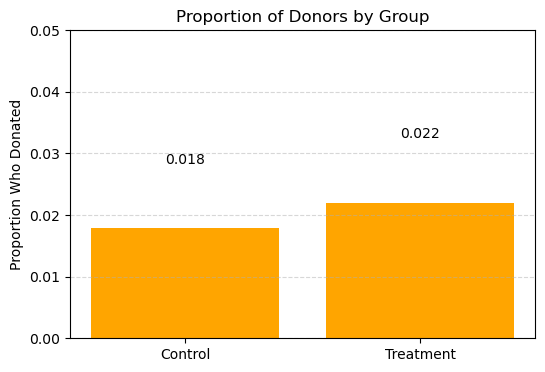

In [16]:
# Calculate the mean of 'gave' for control and treatment
donation_rates = df.groupby("treatment")["gave"].mean()

# Create labels and values for the plot
labels = ["Control", "Treatment"]
rates = [donation_rates[0], donation_rates[1]]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(labels, rates, color='orange')
plt.title("Proportion of Donors by Group")
plt.ylabel("Proportion Who Donated")
plt.ylim(0, 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add data labels on top of bars
for i, rate in enumerate(rates):
    plt.text(i, rate + 0.01, f"{rate:.3f}", ha='center', va='bottom')

plt.show()

In [ ]:
# Drop any missing values in relevant columns
df_clean = df.dropna(subset=["gave", "treatment"])

# --- T-TEST ---
gave_treatment = df_clean[df_clean["treatment"] == 1]["gave"]
gave_control = df_clean[df_clean["treatment"] == 0]["gave"]

t_stat, p_val = ttest_ind(gave_treatment, gave_control)

# --- LINEAR REGRESSION ---
model = smf.ols("gave ~ treatment", data=df_clean).fit()
coef = model.params["treatment"]
reg_pval = model.pvalues["treatment"]

# --- PRINT RESULTS ---
print("T-Test Results:")
print(f"  t-statistic = {t_stat:.4f}")
print(f"  p-value     = {p_val:.4f}")

print("\nLinear Regression Results:")
print(f"  Coefficient = {coef:.4f}")
print(f"  p-value     = {reg_pval:.4f}")

# Interpretation in plain English
if p_val < 0.05:
    print("\nInterpretation:")
    print("  The treatment group was significantly more likely to donate than the control group.")
    print("  This suggests that the experimental message or treatment had a real behavioral impact.")
else:
    print("\nInterpretation:")
    print("  There is no statistically significant difference in donation rates between groups.")

T-Test Results:
  t-statistic = 3.1014
  p-value     = 0.0019

Linear Regression Results:
  Coefficient = 0.0042
  p-value     = 0.0019

Interpretation:
  The treatment group was significantly more likely to donate than the control group.
  This suggests that the experimental message or treatment had a real behavioral impact.


In [20]:
df_probit = df.dropna(subset=["gave", "treatment"])

# Define independent (X) and dependent (y) variables
X = sm.add_constant(df_probit["treatment"])  # Add constant (intercept)
y = df_probit["gave"]

# Fit the probit model
probit_model = sm.Probit(y, X).fit()

# Print summary
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.100443
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                   gave   No. Observations:                50083
Model:                         Probit   Df Residuals:                    50081
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Apr 2025   Pseudo R-squ.:               0.0009783
Time:                        21:32:46   Log-Likelihood:                -5030.5
converged:                       True   LL-Null:                       -5035.4
Covariance Type:            nonrobust   LLR p-value:                  0.001696
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1001      0.023    -90.073      0.000      -2.146      -2.054
treatment      0.0868      0.

### Differences between Match Rates

In [21]:
# Clean and filter relevant data
df_ratio_test = df.dropna(subset=["gave", "ratio2", "ratio3"])

# Define match ratio groups
group_1_to_1 = df_ratio_test[(df_ratio_test["ratio2"] == 0) & (df_ratio_test["ratio3"] == 0)]["gave"]
group_2_to_1 = df_ratio_test[df_ratio_test["ratio2"] == 1]["gave"]
group_3_to_1 = df_ratio_test[df_ratio_test["ratio3"] == 1]["gave"]

# T-tests
t_stat_2, p_val_2 = ttest_ind(group_1_to_1, group_2_to_1)
t_stat_3, p_val_3 = ttest_ind(group_1_to_1, group_3_to_1)

# Print results
print("T-Test: 2:1 Match vs 1:1 Match")
print(f"  t-statistic = {t_stat_2:.4f}")
print(f"  p-value     = {p_val_2:.4f}\n")

print("T-Test: 3:1 Match vs 1:1 Match")
print(f"  t-statistic = {t_stat_3:.4f}")
print(f"  p-value     = {p_val_3:.4f}")

# Interpretation
print("\nInterpretation:")
if p_val_2 < 0.05 or p_val_3 < 0.05:
    print("There is a statistically significant difference in donation rates between groups.")
    print("However, the direction of the effect shows that higher match ratios (2:1 and 3:1) do NOT increase donation likelihood.")
    print("This supports the paper's claim on page 8 that 'larger match ratios... had no additional impact.'")
else:
    print("There is no statistically significant difference between the groups.")
    print("This confirms that increasing the match ratio beyond 1:1 does not lead to higher donation rates, as the authors suggest.")

T-Test: 2:1 Match vs 1:1 Match
  t-statistic = -2.3020
  p-value     = 0.0213

T-Test: 3:1 Match vs 1:1 Match
  t-statistic = -2.3636
  p-value     = 0.0181

Interpretation:
There is a statistically significant difference in donation rates between groups.
However, the direction of the effect shows that higher match ratios (2:1 and 3:1) do NOT increase donation likelihood.
This supports the paper's claim on page 8 that 'larger match ratios... had no additional impact.'


In [22]:
# Create 'ratio1' dummy: 1 if both ratio2 and ratio3 are 0 (i.e., it's a 1:1 match)
df_ratio_test["ratio1"] = ((df_ratio_test["ratio2"] == 0) & (df_ratio_test["ratio3"] == 0)).astype(int)

# Run regression
model = smf.ols("gave ~ ratio1 + ratio2 + ratio3", data=df_ratio_test).fit()

# Display regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   gave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.742
Date:                Wed, 23 Apr 2025   Prob (F-statistic):             0.0416
Time:                        21:37:36   Log-Likelihood:                 26629.
No. Observations:               50083   AIC:                        -5.325e+04
Df Residuals:                   50079   BIC:                        -5.321e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.229e+10   1.54e+11      0.080      0.9

### Size of Charitable Contribution

In [23]:
# Drop missing values from the donation amount and treatment columns
df_amount = df.dropna(subset=["amount", "treatment"])

# --- T-TEST ---
donation_treatment = df_amount[df_amount["treatment"] == 1]["amount"]
donation_control = df_amount[df_amount["treatment"] == 0]["amount"]

t_stat, p_val = ttest_ind(donation_treatment, donation_control)

print("T-Test: Donation Amount by Treatment")
print(f"  t-statistic = {t_stat:.4f}")
print(f"  p-value     = {p_val:.4f}\n")

# --- LINEAR REGRESSION ---
model = smf.ols("amount ~ treatment", data=df_amount).fit()
print("Linear Regression: Donation Amount ~ Treatment")
print(model.summary())

T-Test: Donation Amount by Treatment
  t-statistic = 1.8605
  p-value     = 0.0628

Linear Regression: Donation Amount ~ Treatment
                            OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.461
Date:                Wed, 23 Apr 2025   Prob (F-statistic):             0.0628
Time:                        21:38:21   Log-Likelihood:            -1.7946e+05
No. Observations:               50083   AIC:                         3.589e+05
Df Residuals:                   50081   BIC:                         3.589e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


#### If the t-test or regression shows a statistically significant difference, it means that the treatment influenced the size of donations, not just whether people donated.

#### If not significant, then the treatment increased response rate, but not donation size, which aligns with the "extensive margin" effect described in behavioral economics.

In [24]:
# Filter to people who made a donation (amount > 0)
df_positive_donors = df[(df["amount"] > 0) & df["treatment"].notna()]

# --- T-TEST ---
donation_treatment = df_positive_donors[df_positive_donors["treatment"] == 1]["amount"]
donation_control = df_positive_donors[df_positive_donors["treatment"] == 0]["amount"]

t_stat, p_val = ttest_ind(donation_treatment, donation_control)

print("T-Test (Donors Only): Donation Amount by Treatment")
print(f"  t-statistic = {t_stat:.4f}")
print(f"  p-value     = {p_val:.4f}\n")

# --- REGRESSION ---
model = smf.ols("amount ~ treatment", data=df_positive_donors).fit()
print("Linear Regression (Donors Only): Donation Amount ~ Treatment")
print(model.summary())

T-Test (Donors Only): Donation Amount by Treatment
  t-statistic = -0.5808
  p-value     = 0.5615

Linear Regression (Donors Only): Donation Amount ~ Treatment
                            OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3374
Date:                Wed, 23 Apr 2025   Prob (F-statistic):              0.561
Time:                        21:44:20   Log-Likelihood:                -5326.8
No. Observations:                1034   AIC:                         1.066e+04
Df Residuals:                    1032   BIC:                         1.067e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

#### This analysis isolates the intensive margin: how much people give once they’ve decided to donate.
#### If the treatment coefficient is not significant, it suggests the treatment affected whether people give (extensive margin), but not how much they give. If it's significant, then the treatment changes the amount donated as well.

#### Yes, the treatment coefficient has a causal interpretation only if random assignment is preserved and we're not conditioning on post-treatment behavior.

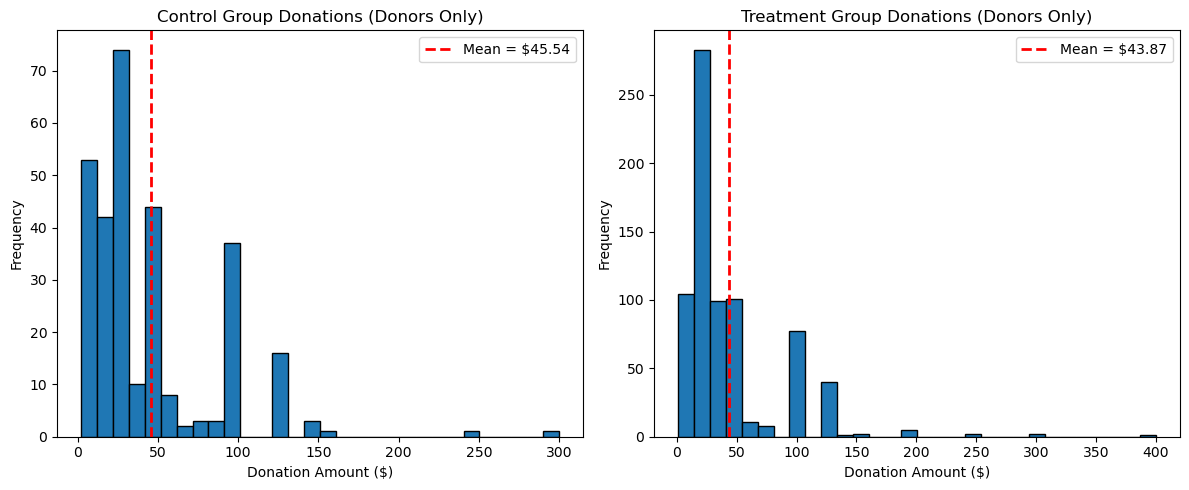

In [26]:
# Keep only donors (amount > 0)
df_donors = df[df["amount"] > 0]

# Split into treatment and control groups
treatment_donors = df_donors[df_donors["treatment"] == 1]["amount"]
control_donors = df_donors[df_donors["treatment"] == 0]["amount"]

# Calculate group means
mean_treatment = treatment_donors.mean()
mean_control = control_donors.mean()

# Plotting
plt.figure(figsize=(12, 5))

# Control group plot
plt.subplot(1, 2, 1)
plt.hist(control_donors, bins=30, edgecolor='black')
plt.axvline(mean_control, color='red', linestyle='dashed', linewidth=2, label=f"Mean = ${mean_control:.2f}")
plt.title("Control Group Donations (Donors Only)")
plt.xlabel("Donation Amount ($)")
plt.ylabel("Frequency")
plt.legend()

# Treatment group plot
plt.subplot(1, 2, 2)
plt.hist(treatment_donors, bins=30, edgecolor='black')
plt.axvline(mean_treatment, color='red', linestyle='dashed', linewidth=2, label=f"Mean = ${mean_treatment:.2f}")
plt.title("Treatment Group Donations (Donors Only)")
plt.xlabel("Donation Amount ($)")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

### Law of Large Numbers

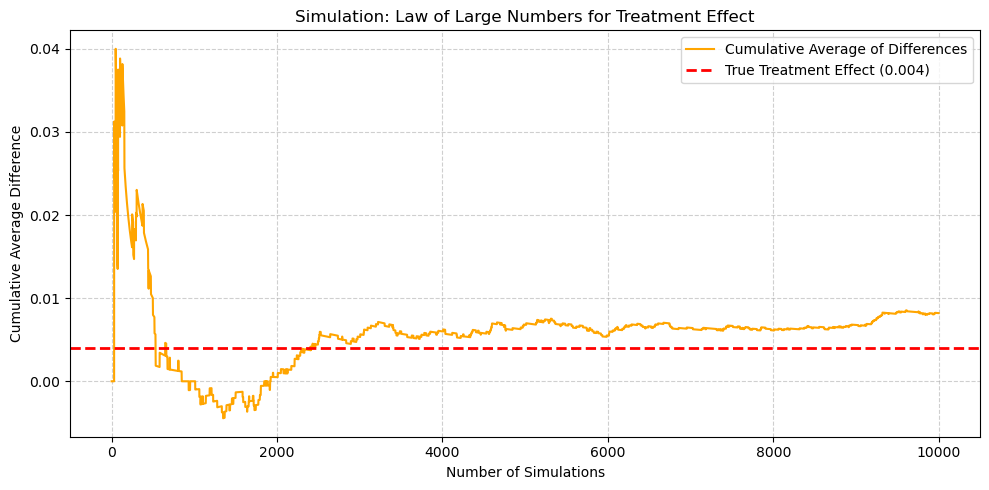

In [29]:
# Set seed for reproducibility
np.random.seed(42)

# Simulate 10,000 Bernoulli draws for control (p = 0.018) and treatment (p = 0.022)
control_draws = np.random.binomial(n=1, p=0.018, size=10000)
treatment_draws = np.random.binomial(n=1, p=0.022, size=10000)

# Calculate the differences between treatment and control draws
differences = treatment_draws - control_draws

# Compute the cumulative average of the differences
cumulative_avg = np.cumsum(differences) / np.arange(1, len(differences) + 1)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(cumulative_avg, color='orange', label='Cumulative Average of Differences')
plt.axhline(y=0.004, color='red', linestyle='--', linewidth=2, label='True Treatment Effect (0.004)')
plt.title("Simulation: Law of Large Numbers for Treatment Effect")
plt.xlabel("Number of Simulations")
plt.ylabel("Cumulative Average Difference")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

#### The orange line shows the cumulative average difference in donation rates over increasing sample sizes.
#### The red dashed line is the true average treatment effect: 0.022 - 0.018 = 0.004

#### At first, the cumulative difference is noisy — it jumps around. As more samples are included, the average "settles down" near the true effect of 0.004. This demonstrates that with large enough samples, random variation diminishes, revealing the true underlying effect.

### Central Limit Theorem

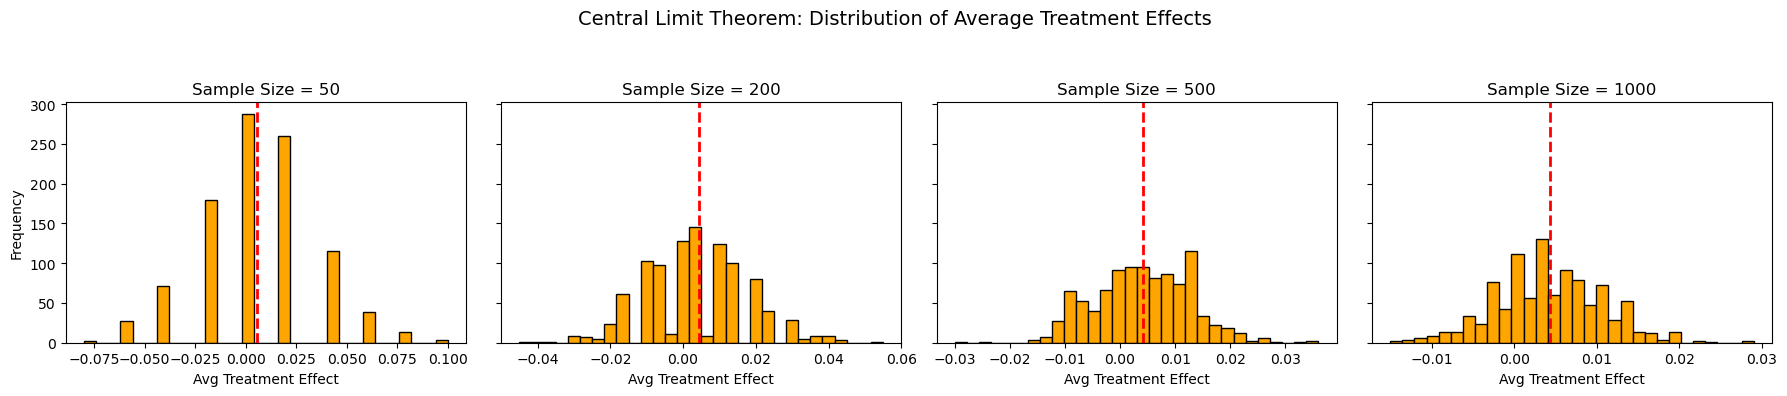

In [30]:
# Parameters
sample_sizes = [50, 200, 500, 1000]
num_repeats = 1000
p_control = 0.018
p_treatment = 0.022

# Set up subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 4), sharey=True)

# Loop through each sample size
for i, n in enumerate(sample_sizes):
    avg_diffs = []
    for _ in range(num_repeats):
        control = np.random.binomial(1, p_control, n)
        treatment = np.random.binomial(1, p_treatment, n)
        avg_diff = treatment.mean() - control.mean()
        avg_diffs.append(avg_diff)

    # Plot histogram of average treatment effects
    ax = axes[i]
    ax.hist(avg_diffs, bins=30, edgecolor='black', color='orange')
    ax.axvline(np.mean(avg_diffs), color='red', linestyle='--', linewidth=2, label="Mean")
    ax.set_title(f"Sample Size = {n}")
    ax.set_xlabel("Avg Treatment Effect")
    if i == 0:
        ax.set_ylabel("Frequency")

plt.suptitle("Central Limit Theorem: Distribution of Average Treatment Effects", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

#### Each plot shows the distribution of average treatment effects calculated from 1,000 repeated samples at different sample sizes: 50, 200, 500, and 1000.
#### As the sample size increases: 1. The distribution becomes less spread out (narrower) 2. The shape becomes more symmetric and bell-shaped, resembling a normal distribution 3. The mean converges around the true treatment effect (~0.004), shown by the red dashed line

#### This illustrates the CLT: the sampling distribution of the mean tends toward a normal distribution as sample size grows, regardless of the underlying data distribution.